# IE 582 Homework 2
# Mert IŞIK
# 2019702075

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#importing data
x_train = pd.read_csv('D:\\Dersler\\IE 582\\HW2\\uWaveGestureLibrary_X_TRAIN.txt', sep='\s+', header=None)
y_train = pd.read_csv('D:\\Dersler\\IE 582\\HW2\\uWaveGestureLibrary_Y_TRAIN.txt', sep='\s+', header=None)
z_train = pd.read_csv('D:\\Dersler\\IE 582\\HW2\\uWaveGestureLibrary_Z_TRAIN.txt', sep='\s+', header=None)

In [3]:
#taking cumulative sum for the velocity. In homework explanation pdf, it is said that values should be converted to velocity.
x_train.iloc[:,1:] = x_train.iloc[:,1:].cumsum(axis=1)
y_train.iloc[:,1:] = y_train.iloc[:,1:].cumsum(axis=1)
z_train.iloc[:,1:] = y_train.iloc[:,1:].cumsum(axis=1)

QUESTION A)

In [4]:
#show the first index of time when a user is observed
for i in range (1,9):
    print("User {0} in index {1} firstly".format(i, x_train[x_train[0]==i].index.values.astype(int)[0]))

User 1 in index 10 firstly
User 2 in index 14 firstly
User 3 in index 3 firstly
User 4 in index 4 firstly
User 5 in index 1 firstly
User 6 in index 0 firstly
User 7 in index 6 firstly
User 8 in index 5 firstly


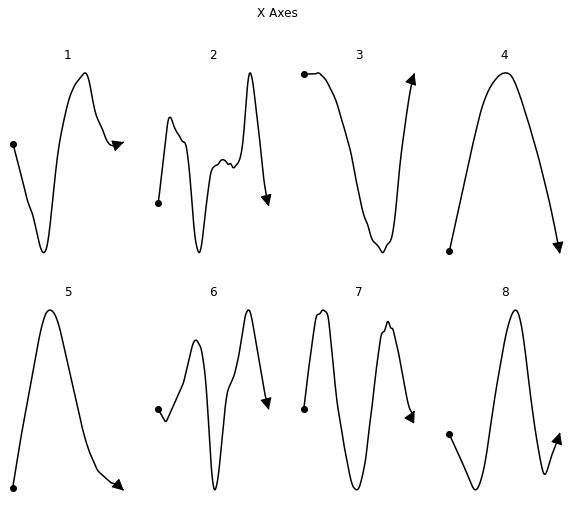

In [5]:
### Velocity plot for X axes for all users.
fig, axs = plt.subplots(2, 4,figsize=(10,8))
fig.suptitle('X Axes')
x=0
y=0
for i in range (1,9):
    axs[x, y].plot(x_train.iloc[x_train[x_train[0]==i].index.values.astype(int)[0],1:],color='black',markersize=1)
    axs[x, y].plot(1,x_train.iloc[x_train[x_train[0]==i].index.values.astype(int)[0],1] , 'go',color='black') ##point
    axs[x, y].annotate("", xy=(315, x_train.iloc[x_train[x_train[0]==i].index.values.astype(int)[0],315]), xytext=(314, x_train.iloc[x_train[x_train[0]==i].index.values.astype(int)[0],314]),
                       arrowprops=dict(facecolor='black',headwidth=10, headlength=10, width=0.1), color='black') ##arrow
    axs[x, y].set_title(i)
    axs[x, y].axis('off')
    if i < 4 or i > 4:
        y = y+1
    if i == 4:
        y=0
        x=1


Point and arrow show beginning and finishing values, respectively. Axis are closed because in the homework pdf axis are not shown. All users show remarkable change in action for X axes. There are sharp turning points. Although they increases the value dramatically, sometimes they decreases the value. Moreover, class 2,6 and 7 show similar actions for X Axes. Besides class 4 and 5 show similiar actions.

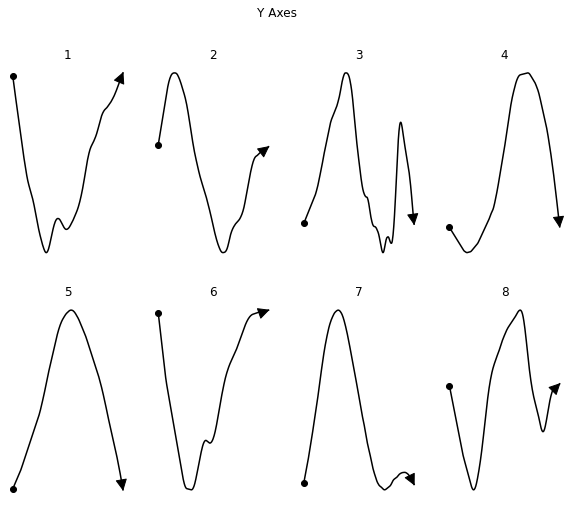

In [6]:
### Velocity plot for Y axes for all users.

fig, axs = plt.subplots(2, 4,figsize=(10,8))
fig.suptitle('Y Axes')
x=0
y=0
for i in range (1,9):
    axs[x, y].plot(y_train.iloc[y_train[y_train[0]==i].index.values.astype(int)[0],1:],color='black',markersize=1)
    axs[x, y].plot(1,y_train.iloc[y_train[y_train[0]==i].index.values.astype(int)[0],1] , 'go',color='black')  #plot
    axs[x, y].annotate("", xy=(315, y_train.iloc[y_train[y_train[0]==i].index.values.astype(int)[0],315]), xytext=(314, y_train.iloc[y_train[y_train[0]==i].index.values.astype(int)[0],314]), 
                       arrowprops=dict(facecolor='black',headwidth=10, headlength=10, width=0.1), color='black') ##arrow
    axs[x, y].set_title(i)
    axs[x, y].axis('off')
    if i < 4 or i > 4:
        y = y+1
    if i == 4:
        y=0
        x=1

Point and arrow show beginning and finishing values, respectively. Axis are closed because in the homework pdf axis are not shown. All users show remarkable change in action for X axes. There a lot of sharp turning points. Although they increases the value dramatically, sometimes they decreases the value. Moreover, class 4,5 and 7 show similar actions for Y Axes. Besides class 1 and 6 show similiar actions.

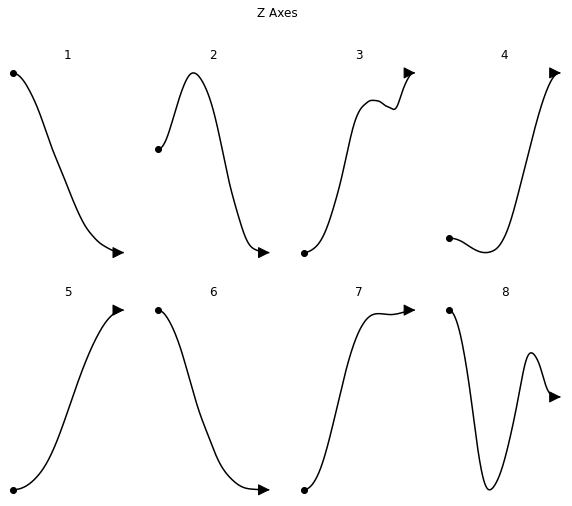

In [7]:
### Velocity plot for Z axes for all users.

fig, axs = plt.subplots(2, 4,figsize=(10,8))
fig.suptitle('Z Axes')
x=0
y=0
for i in range (1,9):
    axs[x, y].plot(z_train.iloc[z_train[z_train[0]==i].index.values.astype(int)[0],1:],color='black',markersize=1)
    axs[x, y].plot(1,z_train.iloc[z_train[z_train[0]==i].index.values.astype(int)[0],1] , 'go',color='black')  #point
    axs[x, y].annotate("", xy=(315, z_train.iloc[z_train[z_train[0]==i].index.values.astype(int)[0],315]), xytext=(314, z_train.iloc[z_train[z_train[0]==i].index.values.astype(int)[0],314]), 
                       arrowprops=dict(facecolor='black',headwidth=10, headlength=10, width=0.1), color='black')  #arrow
    axs[x, y].set_title(i)
    axs[x, y].axis('off')
    if i < 4 or i > 4:
        y = y+1
    if i == 4:
        y=0
        x=1

Point and arrow show beginning and finishing values, respectively. Axis are closed because in the homework pdf axis are not shown. All users show remarkable change in action for Z axes. Unlike to X and Y axes, for axis Z, there are not sharp turning point except in class 2 and 8. Classes generally protect their acceleration or behaviors for Z axis. Moreover, class 3,4,5 and 7 show similar actions for Z Axes. Besides class 1 and 6 show similiar actions.

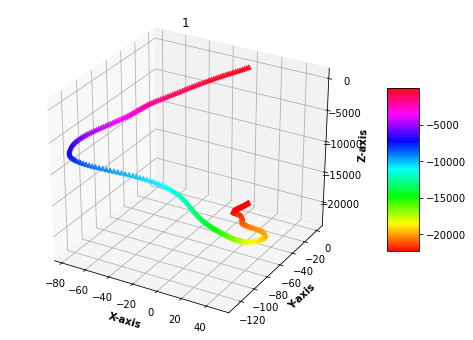

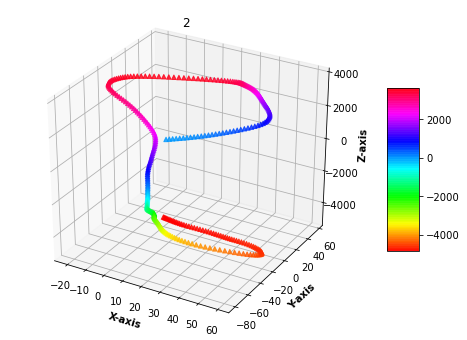

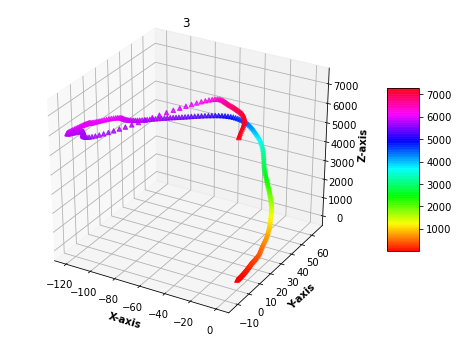

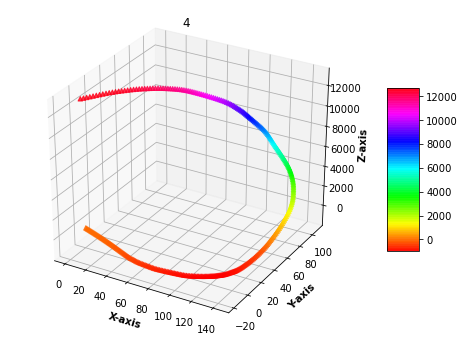

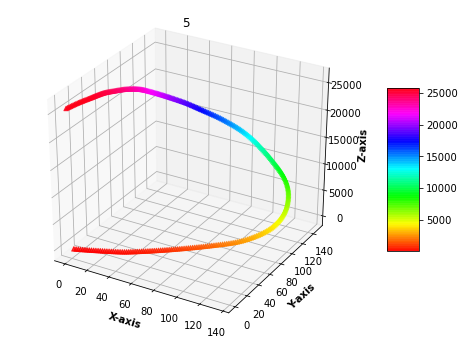

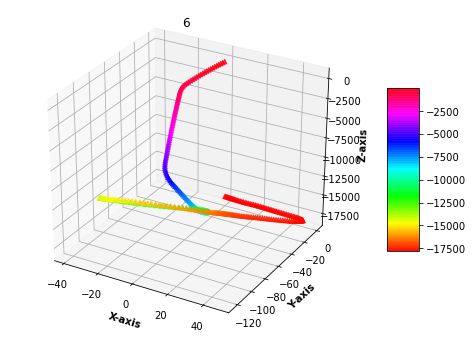

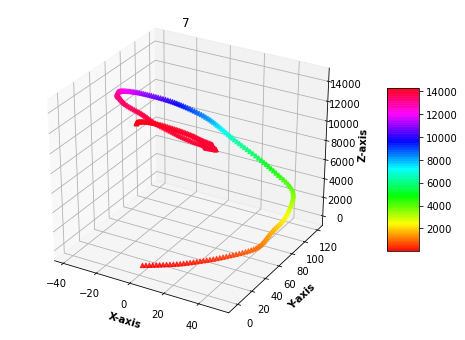

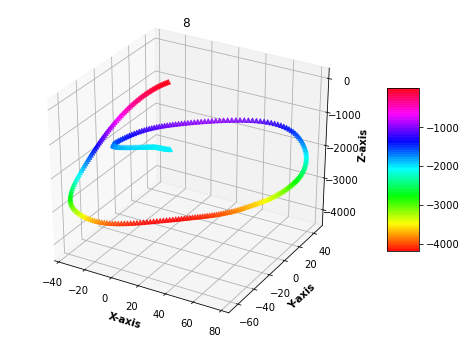

In [8]:
### 3D graphs with all axes for all users.

a = 0
b = 0
for i in range (1,9):
    x = x_train.iloc[x_train[x_train[0]==i].index.values.astype(int)[0],1:]
    y = y_train.iloc[y_train[y_train[0]==i].index.values.astype(int)[0],1:]
    z = z_train.iloc[z_train[z_train[0]==i].index.values.astype(int)[0],1:]

    axs[a, b].fig = plt.figure(figsize = (8, 6))
    axs[a, b] = plt.axes(projection ="3d")
    axs[a, b].grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
    my_cmap = plt.get_cmap('hsv')
    sctt = axs[a, b].scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
    axs[a, b].set_title(i)
    axs[a, b].set_xlabel('X-axis', fontweight ='bold') 
    axs[a, b].set_ylabel('Y-axis', fontweight ='bold') 
    axs[a, b].set_zlabel('Z-axis', fontweight ='bold')
    fig.colorbar(sctt, ax = axs[a,b], shrink = 0.5, aspect = 5) 
    if i < 4 or i > 4:
        b = b+1
    if i == 4:
        b=0
        a=1

QUESTION B)

In [9]:
#drop class information before concatenate
dfy = y_train.drop(columns=[0])
dfz = z_train.drop(columns=[0])

In [10]:
#xmelted: convert to xtrain to long shape
x_train["Time Series ID"] = x_train.index
x_train = x_train.rename(columns={0: "Class"})
x_melted = pd.melt(x_train, id_vars=["Time Series ID", "Class"],var_name='Time Index', value_name='X')
x_melted.index = x_melted["Time Series ID"]
x_melted = x_melted.drop(columns=["Time Series ID"])
x_melted = x_melted.sort_values(by=['Time Series ID','Time Index'])
#x_melted["Time SeriesID"] = x_melted.index

x_melted = x_melted.reset_index()

In [11]:
#ymelted: convert to ytrain to long shape
dfy["Time Series ID"] = dfy.index
y_melted = pd.melt(dfy, id_vars=["Time Series ID"],var_name='Time Index', value_name='Y')
y_melted.index = y_melted["Time Series ID"]
y_melted = y_melted.drop(columns=["Time Series ID"])
y_melted = y_melted.sort_values(by=['Time Series ID','Time Index'])
#y_melted["Time SeriesID"] = y_melted.index
y_melted = y_melted.reset_index()

In [12]:
#zmelted: convert to ztrain to long shape
dfz["Time Series ID"] = dfz.index
z_melted = pd.melt(dfz, id_vars=["Time Series ID"],var_name='Time Index', value_name='Z')
z_melted.index = z_melted["Time Series ID"]
z_melted = z_melted.drop(columns=["Time Series ID"])
z_melted = z_melted.sort_values(by=['Time Series ID','Time Index'])
#z_melted["Time SeriesID"] = z_melted.index
z_melted = z_melted.reset_index()

In [13]:
xy = pd.merge(x_melted, y_melted, on = ['Time Series ID', 'Time Index']) #merging x,y

In [14]:
df_long = pd.merge(xy,z_melted, on= ['Time Series ID', 'Time Index']) #merging x,y,z

In [15]:
df_long = df_long[["Time Series ID", "Time Index", "X", "Y", "Z", "Class"]] #reorder column

In [16]:
df_long #it is the last shape of dataframe.

,Time Series ID,Time Index,X,Y,Z,Class
0,0,1,-3.042432e-01,-2.119396e+00,-2.119396,6.0
1,0,2,-6.084864e-01,-4.238792e+00,-6.358187,6.0
2,0,3,-9.127296e-01,-6.358187e+00,-12.716375,6.0
3,0,4,-1.216973e+00,-8.477583e+00,-21.193958,6.0
4,0,5,-1.521216e+00,-1.059698e+01,-31.790937,6.0
...,...,...,...,...,...,...
282235,895,311,-7.691264e+00,2.885849e+00,23560.577164,5.0
282236,895,312,-5.662732e+00,2.065198e+00,23562.642363,5.0
282237,895,313,-3.675465e+00,1.310673e+00,23563.953036,5.0
282238,895,314,-1.787888e+00,6.222737e-01,23564.575309,5.0


---PCA---

In [17]:
##standardizing
from sklearn.preprocessing import StandardScaler
features = ['X', 'Y', 'Z']
# Separating out the features
vec = df_long.loc[:, features].values
# Standardizing the features
vec = StandardScaler().fit_transform(vec)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(vec)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA'])

In [19]:
finalDf = pd.concat([principalDf, df_long[['Time Series ID', 'Time Index', 'Class',"X", "Y", "Z"]]], axis = 1)

In [20]:
finalDf = finalDf[["Time Series ID", "Time Index", "X", "Y", "Z","PCA", "Class"]] #reorder column

In [21]:
finalDf ##long shape with PCA values

,Time Series ID,Time Index,X,Y,Z,PCA,Class
0,0,1,-3.042432e-01,-2.119396e+00,-2.119396,0.026371,6.0
1,0,2,-6.084864e-01,-4.238792e+00,-6.358187,0.003067,6.0
2,0,3,-9.127296e-01,-6.358187e+00,-12.716375,-0.020364,6.0
3,0,4,-1.216973e+00,-8.477583e+00,-21.193958,-0.043923,6.0
4,0,5,-1.521216e+00,-1.059698e+01,-31.790937,-0.067609,6.0
...,...,...,...,...,...,...,...
282235,895,311,-7.691264e+00,2.885849e+00,23560.577164,1.453889,5.0
282236,895,312,-5.662732e+00,2.065198e+00,23562.642363,1.457103,5.0
282237,895,313,-3.675465e+00,1.310673e+00,23563.953036,1.460706,5.0
282238,895,314,-1.787888e+00,6.222737e-01,23564.575309,1.464375,5.0


In [22]:
##preparing data for each users

one = finalDf[finalDf['Class']==1.0] #filtering
onet = one['Time Series ID'].unique() ##shows time series ID with class 1.0
onedf=one[(one['Time Series ID'] == onet[0]) | (one['Time Series ID'] == onet[1])] #filtering for two time series with class 1.

two = finalDf[finalDf['Class']==2.0] #filtering
twot = two['Time Series ID'].unique() ##shows time series ID with class 2.0
twodf=two[(two['Time Series ID'] == twot[0]) | (two['Time Series ID'] == twot[1])] #filtering for two time series with class 2.

three = finalDf[finalDf['Class']==3.0] #filtering
threet = three['Time Series ID'].unique() ##shows time series ID with class 3.0
threedf=three[(three['Time Series ID'] == threet[0]) | (three['Time Series ID'] == threet[1])] #filtering for two time series with class 4.

four = finalDf[finalDf['Class']==4.0] #filtering
fourt = four['Time Series ID'].unique() ##shows time series ID with class 4.0
fourdf=four[(four['Time Series ID'] == fourt[0]) | (four['Time Series ID'] == fourt[1])] #filtering for two time series with class 2.

five = finalDf[finalDf['Class']==5.0] #filtering
fivet = five['Time Series ID'].unique() ##shows time series ID with class 5.0
fivedf=five[(five['Time Series ID'] == fivet[0]) | (five['Time Series ID'] == fivet[1])] #filtering for two time series with class 5.

six = finalDf[finalDf['Class']==6.0] #filtering
sixt = six['Time Series ID'].unique() ##shows time series ID with class 6.0
sixdf=six[(six['Time Series ID'] == sixt[0]) | (six['Time Series ID'] == sixt[1])] #filtering for two time series with class 6.

seven = finalDf[finalDf['Class']==7.0] #filtering
sevent = seven['Time Series ID'].unique() ##shows time series ID with class 7.0
sevendf=seven[(seven['Time Series ID'] == sevent[0]) | (seven['Time Series ID'] == sevent[1])] #filtering for two time series with class 7.

eight = finalDf[finalDf['Class']==8.0] #filtering
eightt = eight['Time Series ID'].unique() ##shows time series ID with class 8.0
eightdf=eight[(eight['Time Series ID'] == eightt[0]) | (eight['Time Series ID'] == eightt[1])] #filtering for two time series with class 8.

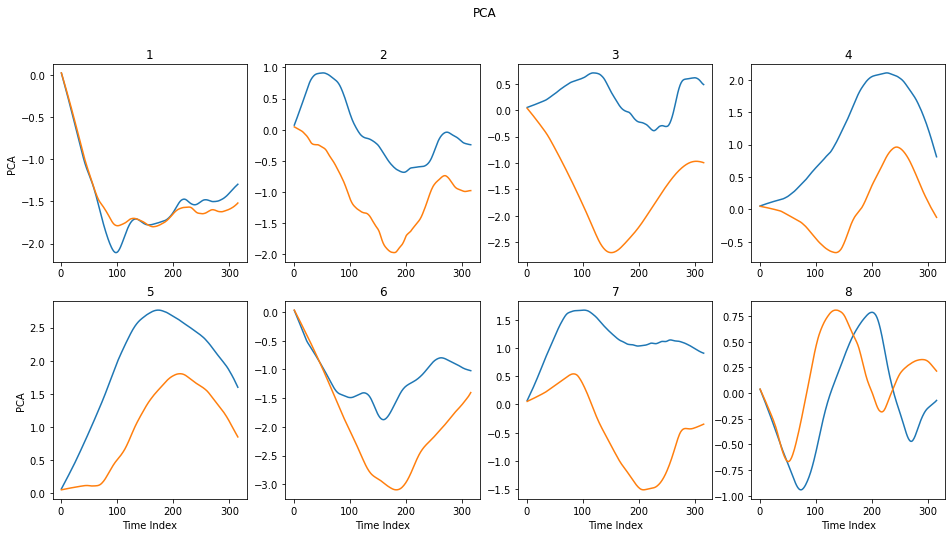

In [23]:
##plotting PCA values for each users

fig, axs = plt.subplots(2, 4,figsize=(16,8))
fig.suptitle('PCA')
x=0
y=0
for k in range (1,9):
    if  k ==1 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), onedf.loc[onedf['Time Series ID'] == onet[i], 'PCA'])
            axs[x, y].set_title('1')
            axs[x, y].set_ylabel('PCA')
            
        
    if  k ==2 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), twodf.loc[twodf['Time Series ID'] == twot[i], 'PCA'])
            axs[x, y].set_title('2')
            
            
    if  k ==3 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), threedf.loc[threedf['Time Series ID'] == threet[i], 'PCA'])
            axs[x, y].set_title('3')
            
            
    if  k ==4 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), fourdf.loc[fourdf['Time Series ID'] == fourt[i], 'PCA'])
            axs[x, y].set_title('4')
            
            
    if  k ==5 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), fivedf.loc[fivedf['Time Series ID'] == fivet[i], 'PCA'])
            axs[x, y].set_title('5')
            axs[x, y].set_xlabel('Time Index')
            axs[x, y].set_ylabel('PCA')
    if  k ==6 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), sixdf.loc[sixdf['Time Series ID'] == sixt[i], 'PCA'])
            axs[x, y].set_title('6')
            axs[x, y].set_xlabel('Time Index')
            
    if  k ==7 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), sevendf.loc[sevendf['Time Series ID'] == sevent[i], 'PCA'])
            axs[x, y].set_title('7')
            axs[x, y].set_xlabel('Time Index')
            
    if  k ==8 :
        for i in range (0,2):
            axs[x, y].plot(list(range(1,316)), eightdf.loc[eightdf['Time Series ID'] == eightt[i], 'PCA'])
            axs[x, y].set_title('8')
            axs[x, y].set_xlabel('Time Index')
            
    
    if k < 4 or k > 4:
        y = y+1
    if k == 4:
        y=0
        x=1  
    

Comment for question b): According to visual inspection, action of users 1,6 and 8 in two different time series cannot be seperated with nonlinear function i.e. we cannot draw a function which seperates blue and orange time series. On the other hand, action of users 2,3,4,5 and 7 can be seperated with non-linear function. We can draw a function which seperates blue and orange time series in these users.

QUESTİON C)

In [24]:
#Data has already been filtered with respect to class above. As one, two ,three....
#PCA is implemented seperately for each class below.
##Comments are made after realizing all PCA's.

PCA 1

In [25]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec1 = one.loc[:, features].values
# Standardizing the features
vec1 = StandardScaler().fit_transform(vec1)
#pca
pca1 = PCA(n_components=1)
principalComponents1 = pca.fit_transform(vec1)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['PCA'])
pca1.fit(vec1)
comp1 = pca1.components_
var1 = pca1.explained_variance_
var11 = pca1.explained_variance_ratio_

comp1
var1 
var11 
np.var(vec1@comp1.T)

1.414473922893514

PCA 2

In [26]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec2 = two.loc[:, features].values
# Standardizing the features
vec2 = StandardScaler().fit_transform(vec2)
#pca
pca2 = PCA(n_components=1)
principalComponents2 = pca.fit_transform(vec2)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA'])
pca2.fit(vec2)
comp2 = pca2.components_
var2 = pca2.explained_variance_
var22 = pca2.explained_variance_ratio_

comp2 
var2  
var22 
np.var(vec2@comp2.T)

1.4322474089273767

PCA 3

In [27]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec3 = three.loc[:, features].values
# Standardizing the features
vec3 = StandardScaler().fit_transform(vec3)
#pca
pca3 = PCA(n_components=1)
principalComponents3 = pca.fit_transform(vec3)
principalDf3 = pd.DataFrame(data = principalComponents3
             , columns = ['PCA'])
pca3.fit(vec3)
comp3 = pca3.components_
var3 = pca3.explained_variance_
var33 = pca3.explained_variance_ratio_

comp3 
var3  
var33 
np.var(vec3@comp3.T)

1.7391577671658076

PCA 4

In [28]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec4 = four.loc[:, features].values
# Standardizing the features
vec4 = StandardScaler().fit_transform(vec4)
#pca
pca4 = PCA(n_components=1)
principalComponents4 = pca.fit_transform(vec4)
principalDf4 = pd.DataFrame(data = principalComponents4
             , columns = ['PCA'])
pca4.fit(vec4)
comp4 = pca4.components_
var4 = pca4.explained_variance_
var44 = pca4.explained_variance_ratio_

comp4 
var4  
var44 
np.var(vec4@comp4.T)

1.6281932691746765

PCA 5

In [29]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec5 = five.loc[:, features].values
# Standardizing the features
vec5 = StandardScaler().fit_transform(vec5)
#pca
pca5 = PCA(n_components=1)
principalComponents5 = pca.fit_transform(vec5)
principalDf5 = pd.DataFrame(data = principalComponents5
             , columns = ['PCA'])
pca5.fit(vec5)
comp5 = pca5.components_
var5 = pca5.explained_variance_
var55 = pca5.explained_variance_ratio_

comp5 
var5 
var55 
np.var(vec5@comp5.T)

1.3147236788380694

PCA 6

In [30]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec6 = six.loc[:, features].values
# Standardizing the features
vec6 = StandardScaler().fit_transform(vec6)
#pca
pca6 = PCA(n_components=1)
principalComponents6 = pca.fit_transform(vec6)
principalDf6 = pd.DataFrame(data = principalComponents6
             , columns = ['PCA'])
pca6.fit(vec6)
comp6 = pca6.components_
var6 = pca6.explained_variance_
var66 = pca6.explained_variance_ratio_

comp6 
var6 
var66 
np.var(vec6@comp6.T)

1.5259393078933927

PCA 7

In [31]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec7 = seven.loc[:, features].values
# Standardizing the features
vec7 = StandardScaler().fit_transform(vec7)
#pca
pca7 = PCA(n_components=1)
principalComponents7 = pca.fit_transform(vec7)
principalDf7 = pd.DataFrame(data = principalComponents7
             , columns = ['PCA'])
pca7.fit(vec7)
comp7 = pca7.components_
var7 = pca7.explained_variance_
var77 = pca7.explained_variance_ratio_

comp7  
var7 
var77
np.var(vec7@comp7.T)

1.6013689398030497

PCA 8

In [32]:
##standardizing
features = ['X', 'Y', 'Z']
# Separating out the features
vec8 = eight.loc[:, features].values
# Standardizing the features
vec8 = StandardScaler().fit_transform(vec8)
#pca
pca8 = PCA(n_components=1)
principalComponents8 = pca.fit_transform(vec8)
principalDf8 = pd.DataFrame(data = principalComponents8
             , columns = ['PCA'])
pca8.fit(vec8)
comp8 = pca8.components_
var8 = pca8.explained_variance_
var88 = pca8.explained_variance_ratio_

comp8 
var8  
var88 
np.var(vec8@comp8.T)

1.5747086088273534

In [33]:
df_pca = pd.DataFrame() ##Create empty dataframe

In [34]:
df_pca['Class'] = list(range(1,9)) ##add class information from 1 to 8.

In [35]:
##Add column with pca values (components and explained variance and ratio) to dataframe.
for i in range (0,8):
    df_pca.at[i, 'Component 1 '] = eval('comp%d'% (i+1))[0][0]
    df_pca.at[i, 'Component 2 '] = eval('comp%d'% (i+1))[0][1]
    df_pca.at[i, 'Component 3 '] = eval('comp%d'% (i+1))[0][2]
    df_pca.at[i, 'Explained Variance'] = eval('var%d'% (i+1))[0]
    df_pca.at[i, 'Explained Variance Ratio'] = eval('var%d%d'%(i+1,i+1))[0]

In [36]:
df_pca  ###dataframe includes pca components, explained variance and the ratio for each class differently.

,Class,Component 1,Component 2,Component 3,Explained Variance,Explained Variance Ratio
0,1,0.710385,0.027140,-0.703290,1.414511,0.471491
1,2,0.356479,-0.555880,-0.750946,1.432290,0.477416
2,3,0.518436,0.606471,0.602841,1.739210,0.579719
3,4,0.422199,0.740554,0.522807,1.628240,0.542731
4,5,-0.108081,-0.719773,-0.685745,1.314757,0.438241
5,6,-0.186271,0.699523,0.689906,1.525983,0.508646
6,7,-0.413958,-0.686909,-0.597323,1.601414,0.533790
7,8,0.530738,0.724555,0.439702,1.574759,0.524903


Comment for Question c): 
Firstly, Component 1,2,3 mean that principal axes in feature space, representing the directions of maximum variance in the data. 
Explained variance means that the amount of variance explained by each of the selected components.
                         It equals to n_components largest eigenvalues of the covariance matrix of X.
Explained variance ratio means that percentage of variance explained by each of the selected components.
For example, component 1(X) and component 3(Z) have huge impact on action of class 1 but inversely.
On the other hand, for class 5, component 1(X) has little bit impact.
Briefly, increase in the absolute value of components means that data are mostly spread out along that axis.
Smaller absoloute values shows little bit spread along that axis. 
Moreover, data is reduced to one dimension 1-PCA. Explained variance ratio shows the percentage of variance explained by one dimension. Ratios for all class are about 0.50. This means that one dimension for this study account for just 50% of the variation in the data. It can be concluded that one dimension is not be enough to describe action of users. Also, first components are not similar for each class.

(0.3, 0.7)

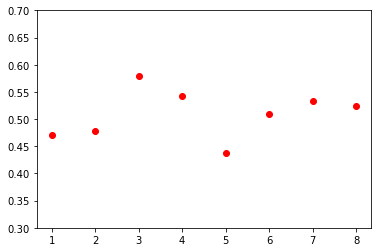

In [37]:
##Explained Variance Ratio plot. It shows that accuracy of pca to explain all data.
fig = plt.figure()
plt.plot(df_pca['Class'], df_pca['Explained Variance Ratio'], 'ro')
plt.ylim(top=0.70)
plt.ylim(bottom=0.30)
##One dimension PCA for class three has the biggest variance explained ratio with 0.58. However, it is not good still.

QUESTİON D)

In [38]:
##converting x_train data to matrix and calculating Euclidean distances between each time series ID. It gives symmetric matrix.
##IT TAKES APPROXIMATELY 30 SECONDS WHILE RUNNNING
x=x_train.drop(['Class', 'Time Series ID'],axis=1)
x=x.to_numpy()
dist_arrX=[]
for i in range(0,896):
    row_dist=[]
    for j in range(0,896):
        a = np.square(x[i]-x[j])
        b = math.sqrt(np.sum(a))
        row_dist.append(b)
    dist_arrX.append(row_dist)

In [39]:
##converting y_train data to matrix and calculating Euclidean distances between each time series ID. It gives symmetric matrix.
##IT TAKES APPROXIMATELY 30 SECONDS WHILE RUNNNING
y=y_train.drop([0],axis=1)
y=y.to_numpy()
dist_arrY=[]
for i in range(0,896):
    row_dist=[]
    for j in range(0,896):
        a = np.square(y[i]-y[j])
        b = math.sqrt(np.sum(a))
        row_dist.append(b)
    dist_arrY.append(row_dist)

In [40]:
##converting z_train data to matrix and calculating Euclidean distances between each time series ID. It gives symmetric matrix.
##IT TAKES APPROXIMATELY 30 SECONDS WHILE RUNNNING
z=z_train.drop([0],axis=1)
z=z.to_numpy()
dist_arrZ=[]
for i in range(0,896):
    row_dist=[]
    for j in range(0,896):
        a = np.square(z[i]-z[j])
        b = math.sqrt(np.sum(a))
        row_dist.append(b)
    dist_arrZ.append(row_dist)

In [41]:
##converting array to numpy array for easier calculation
distz = np.array(dist_arrZ)
disty = np.array(dist_arrY)
distx = np.array(dist_arrX)

In [42]:
final_xy = np.add(distx,disty) #adding x and y
final_distance = np.add(final_xy, distz) #adding x, y and z.

In [43]:
##MDS
##IT TAKES APPROXIMATELY 30 SECONDS WHILE RUNNNING
from sklearn.manifold import MDS
mds = MDS(n_components=2,dissimilarity='precomputed') #reducing two dimension
distance_transformed = mds.fit_transform(final_distance)
distance_transformed.shape #That is true (896,2)

(896, 2)

In [44]:
_class=x_train['Class'] #before creating data frame take the class information
df = pd.DataFrame(data=distance_transformed) #create dataframe with MDS value.
df['Class']=_class ##insert class
df.round(3)  #0 and 1 shows the MDS dimension for each class in different time series.
#Stores the position of the dataset in the embedding space.

,0,1,Class
0,217274.564,-3548.863,6.0
1,-282044.978,67556.829,5.0
2,-111895.456,68996.265,5.0
3,-104235.748,-2068.790,3.0
4,-99131.446,68936.860,4.0
...,...,...,...
891,32450.844,26918.513,3.0
892,116798.860,-40910.951,1.0
893,-15471.964,-42845.054,2.0
894,-12826.996,-36069.105,7.0


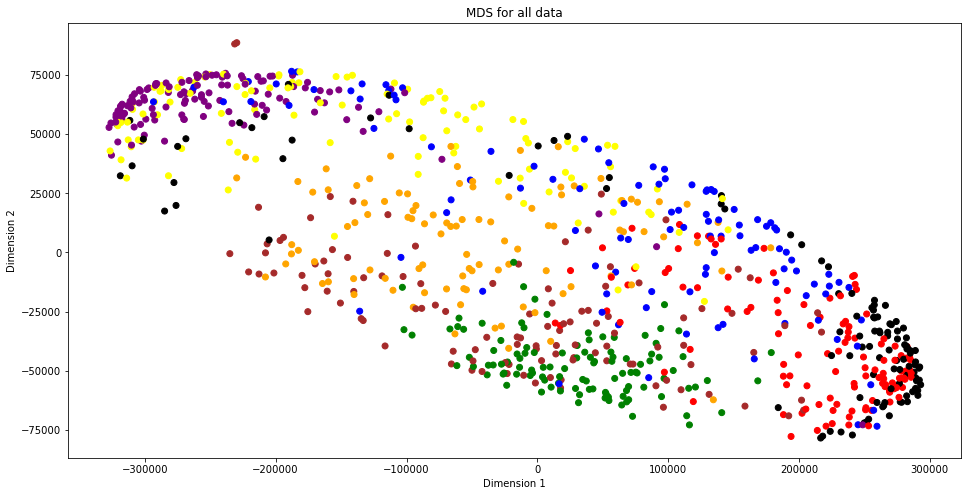

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
##for each class give different colors
colors = {1.0:'red', 2.0:'green', 3.0:'blue', 4.0:'yellow', 5.0:'purple', 6.0:'black', 7.0: 'brown', 8.0:'orange'} 
ax.scatter(df[0], df[1], c=df['Class'].map(colors))
ax.set_title('MDS for all data')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.show()

Comments for question d.): MDS is similar to PCA, but except that instead of converting correlations, it convert distances among the samples.
For instance, class 2(green) and class 4 (yellow) are located in opposite locations. Also, class 6(black) is located mainly right bottom side but it seperated with little bit amount to another location of map. 
Moreover, class 1(red) and class5(purple) are located in opposite locations. Class 1 (red) can be considered easily in right side of map. Finally, class 8(orange) is mainly located of center of map and it is close to other classes.
